In [ ]:
#Importing Important Libraries
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [ ]:
#Mounting Drive
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
#Loading Dataset
data_train = pd.read_csv('/content/gdrive/MyDrive/fashion-mnist_train.csv')
data_test = pd.read_csv('/content/gdrive/MyDrive/fashion-mnist_test.csv')
#Converting to Numpy array
data_train = data_train.to_numpy()
data_test = data_test.to_numpy()
X_train_full = data_train[:,1:]
y_train_full = data_train[:,0]
X_test = data_test[:,1:]
y_test = data_test[:,0]
#Validation Split
X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]
#Standardization
X_mean = X_train.mean(axis=0, keepdims=True)
X_std = X_train.std(axis=0, keepdims=True) + 1e-7
X_train = (X_train - X_mean) / X_std
X_valid = (X_valid - X_mean) / X_std
X_test = (X_test - X_mean) / X_std

X_train = X_train[..., np.newaxis]
X_valid = X_valid[..., np.newaxis]
X_test = X_test[..., np.newaxis]

In [ ]:
from functools import partial
#Creating a default layer to save repetition
DefaultConv2D = partial(keras.layers.Conv2D,
                        kernel_size=3, activation='relu', padding="SAME")
#Reshaping the data
X_train = X_train.reshape(55000,28,28,1)
X_valid = X_valid.reshape(5000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)
#CNN Model Architecture
model = keras.models.Sequential([
    DefaultConv2D(filters=64, kernel_size=7, input_shape=[28, 28, 1]),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=128),
    DefaultConv2D(filters=128),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=256),
    DefaultConv2D(filters=256),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=10, activation='softmax'),
])
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_35 (Conv2D)          (None, 28, 28, 64)        3200      
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 14, 14, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_36 (Conv2D)          (None, 14, 14, 128)       73856     
                                                                 
 conv2d_37 (Conv2D)          (None, 14, 14, 128)       147584    
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 7, 7, 128)        0         
 g2D)                                                            
                                                                 
 conv2d_38 (Conv2D)          (None, 7, 7, 256)        

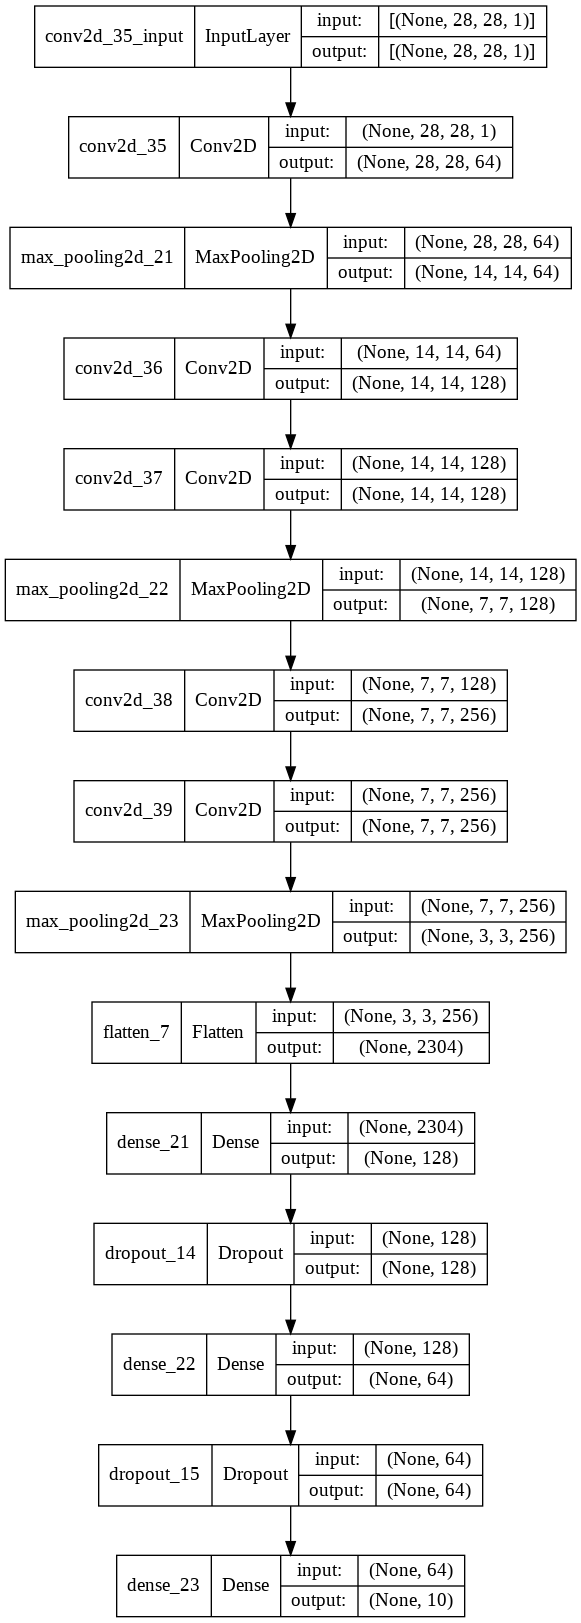

In [ ]:
#Model Plot
keras.utils.plot_model(model, show_shapes=True)

In [ ]:
#Compiling the Model
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))
score = model.evaluate(X_test, y_test)

Epoch 1/30
1719/1719 [==============================] - 38s 21ms/step - loss: 0.7110 - accuracy: 0.7530 - val_loss: 0.3845 - val_accuracy: 0.8638
Epoch 2/30
1719/1719 [==============================] - 36s 21ms/step - loss: 0.4291 - accuracy: 0.8540 - val_loss: 0.3472 - val_accuracy: 0.8756
Epoch 3/30
1719/1719 [==============================] - 36s 21ms/step - loss: 0.3693 - accuracy: 0.8732 - val_loss: 0.3205 - val_accuracy: 0.8854
Epoch 4/30
1719/1719 [==============================] - 36s 21ms/step - loss: 0.3295 - accuracy: 0.8870 - val_loss: 0.3269 - val_accuracy: 0.8860
Epoch 5/30
1719/1719 [==============================] - 37s 21ms/step - loss: 0.3128 - accuracy: 0.8933 - val_loss: 0.2964 - val_accuracy: 0.8932
Epoch 6/30
1719/1719 [==============================] - 36s 21ms/step - loss: 0.2943 - accuracy: 0.8981 - val_loss: 0.3109 - val_accuracy: 0.8968
Epoch 7/30
1719/1719 [==============================] - 37s 21ms/step - loss: 0.2849 - accuracy: 0.9013 - val_loss: 0.3087 -

In [ ]:
#Making final predictions
y_pred = model.predict(X_test)

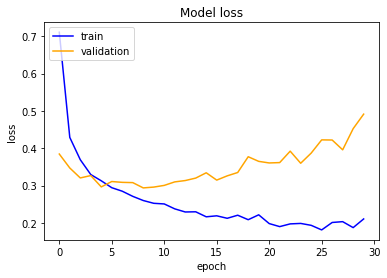

In [ ]:
#Model Loss VS Epoch Plot
plt.plot(history.history['loss'], 'blue')
plt.plot(history.history['val_loss'], 'orange')
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

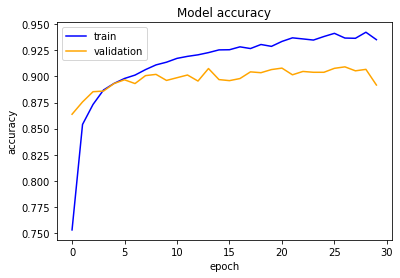

In [ ]:
#Model Accuracy VS Epoch Plot
plt.plot(history.history['accuracy'], 'blue')
plt.plot(history.history['val_accuracy'], 'orange')
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

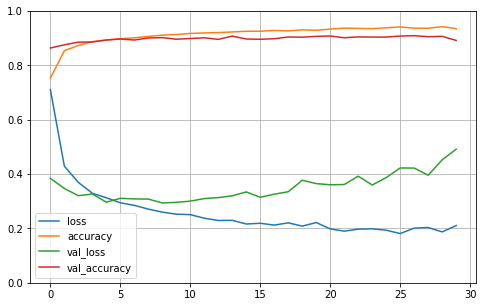

In [ ]:
#Combined Plot
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
#Confusion Matrix
from sklearn.metrics import multilabel_confusion_matrix
multilabel_confusion_matrix(y_test, y_pred.argmax(axis=1))

array([[[8813,  187],
        [ 133,  867]],

       [[8997,    3],
        [   7,  993]],

       [[8884,  116],
        [ 132,  868]],

       [[8856,  144],
        [  60,  940]],

       [[8860,  140],
        [ 145,  855]],

       [[8993,    7],
        [  69,  931]],

       [[8803,  197],
        [ 305,  695]],

       [[8910,   90],
        [  29,  971]],

       [[8977,   23],
        [  30,  970]],

       [[8959,   41],
        [  38,  962]]])

In [ ]:
#Classification Report
from sklearn.metrics import classification_report
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
print(classification_report(y_test, y_pred.argmax(axis=1), target_names=class_names))

              precision    recall  f1-score   support

 T-shirt/top       0.82      0.87      0.84      1000
     Trouser       1.00      0.99      0.99      1000
    Pullover       0.88      0.87      0.87      1000
       Dress       0.87      0.94      0.90      1000
        Coat       0.86      0.85      0.86      1000
      Sandal       0.99      0.93      0.96      1000
       Shirt       0.78      0.69      0.73      1000
     Sneaker       0.92      0.97      0.94      1000
         Bag       0.98      0.97      0.97      1000
  Ankle boot       0.96      0.96      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.90     10000
weighted avg       0.91      0.91      0.90     10000

